In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sameer narwade\Downloads\Data_Train.xlsx - Sheet1.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
def convert_datetime(col):
    df[col]=pd.to_datetime(df[col])
    

In [8]:
convert_datetime('Date_of_Journey')

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
lists = ['Date_of_Journey','Dep_Time','Arrival_Time']
for i in lists:
    convert_datetime(i)

In [11]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-08 05:50:00,2021-11-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-08 18:05:00,2021-11-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-08 16:50:00,2021-11-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
def hours_min(df,col):
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute

In [14]:
hours_min(df,'Dep_Time')
hours_min(df,'Arrival_Time')

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-08 05:50:00,2021-11-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-08 18:05:00,2021-11-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-08 16:50:00,2021-11-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
def drop_cols(col):
    df.drop(col,axis=1,inplace=True)

In [17]:
drop_cols('Dep_Time')
drop_cols('Arrival_Time')
drop_cols('Date_of_Journey')

In [18]:
duration = list(df['Duration'])

In [19]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [20]:
df['Duration'] = duration

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
def hour(col):
    return col.split(' ')[0][0:-1]

def minu(col):
    return col.split(' ')[1][0:-1]

In [23]:
df['Duration_hour'] = df['Duration'].apply(hour)
df['Duration_min'] = df['Duration'].apply(minu)

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [25]:
drop_cols('Duration')

In [26]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_min           object
dtype: object

In [27]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)

In [28]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [29]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_min']

In [30]:

def anaylsis(col):
    plt.figure(figsize=(30,10))
    sns.boxplot(df[col],'Price',data=df.sort_values('Price',ascending=False))

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


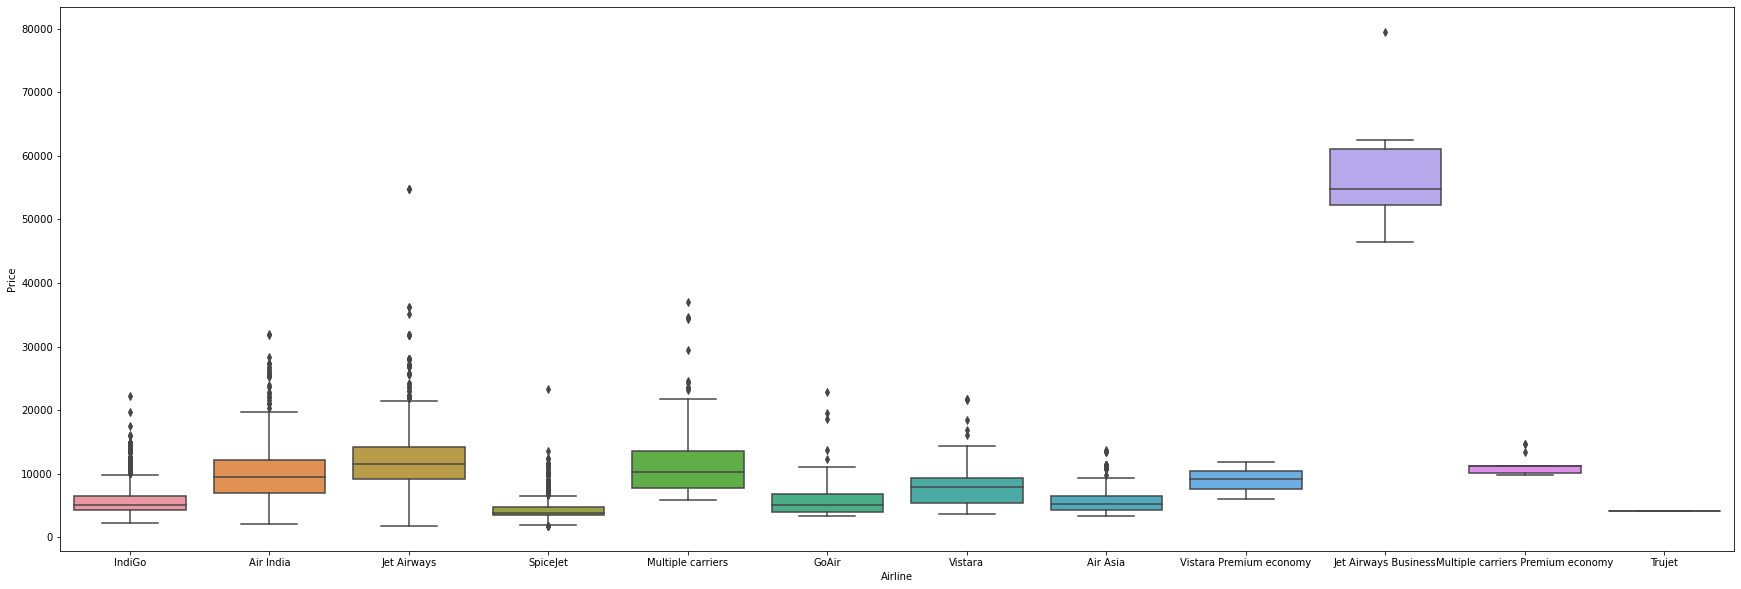

In [31]:
anaylsis('Airline')

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


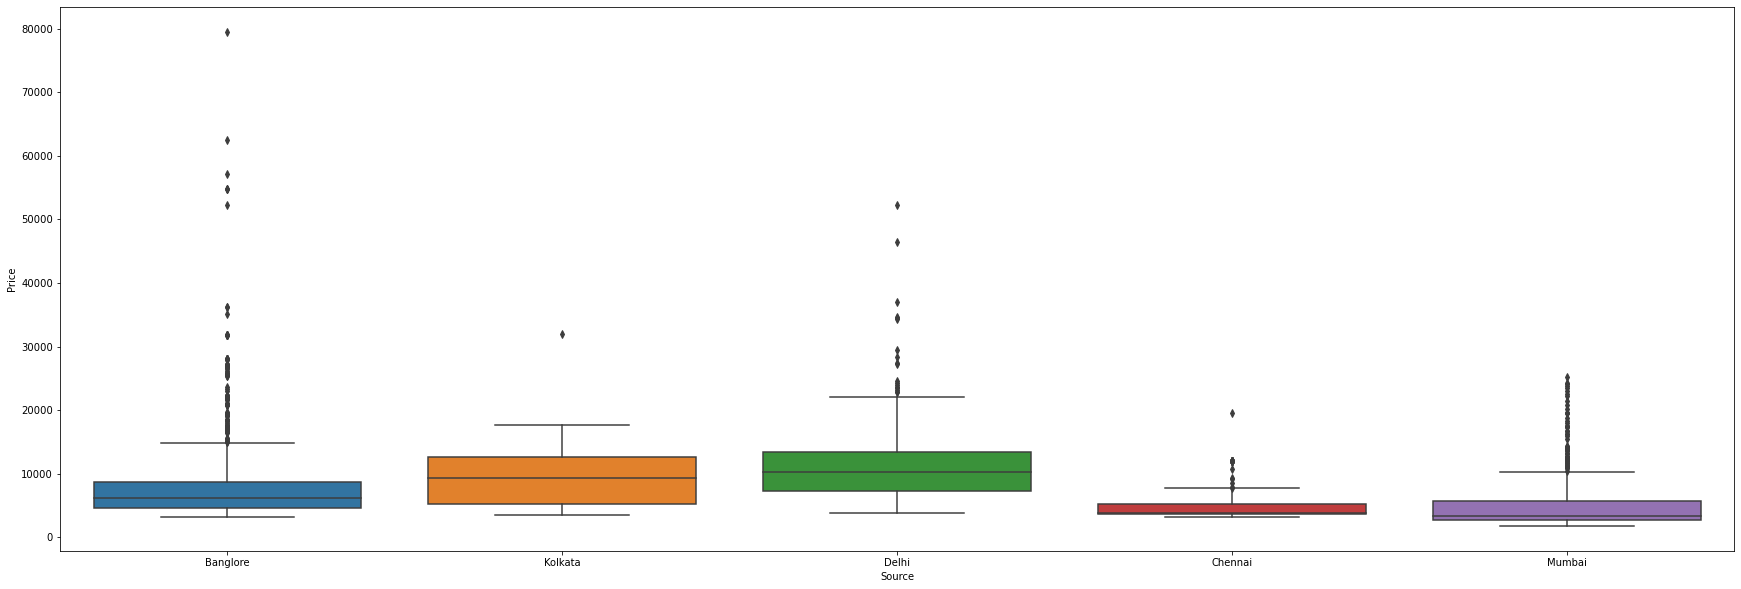

In [32]:
anaylsis('Source')

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


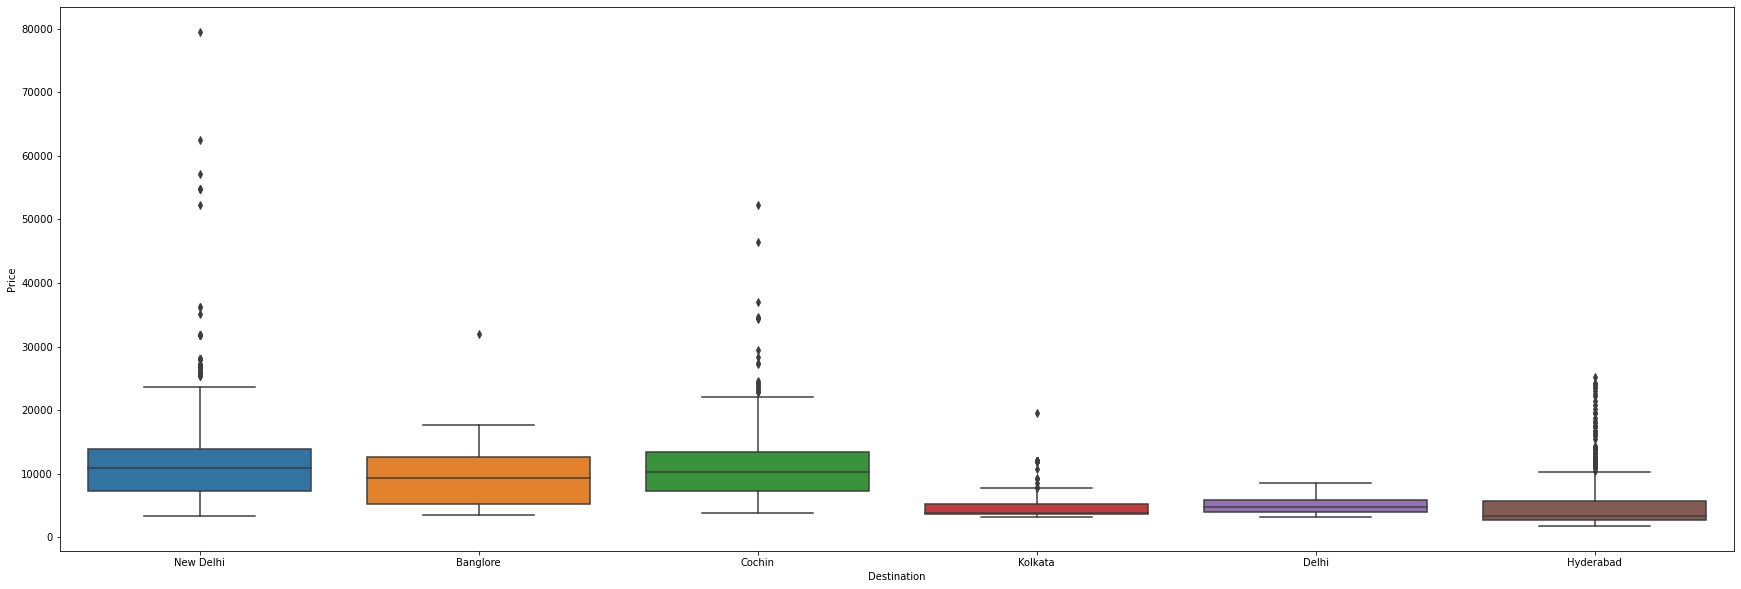

In [33]:
anaylsis('Destination')

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


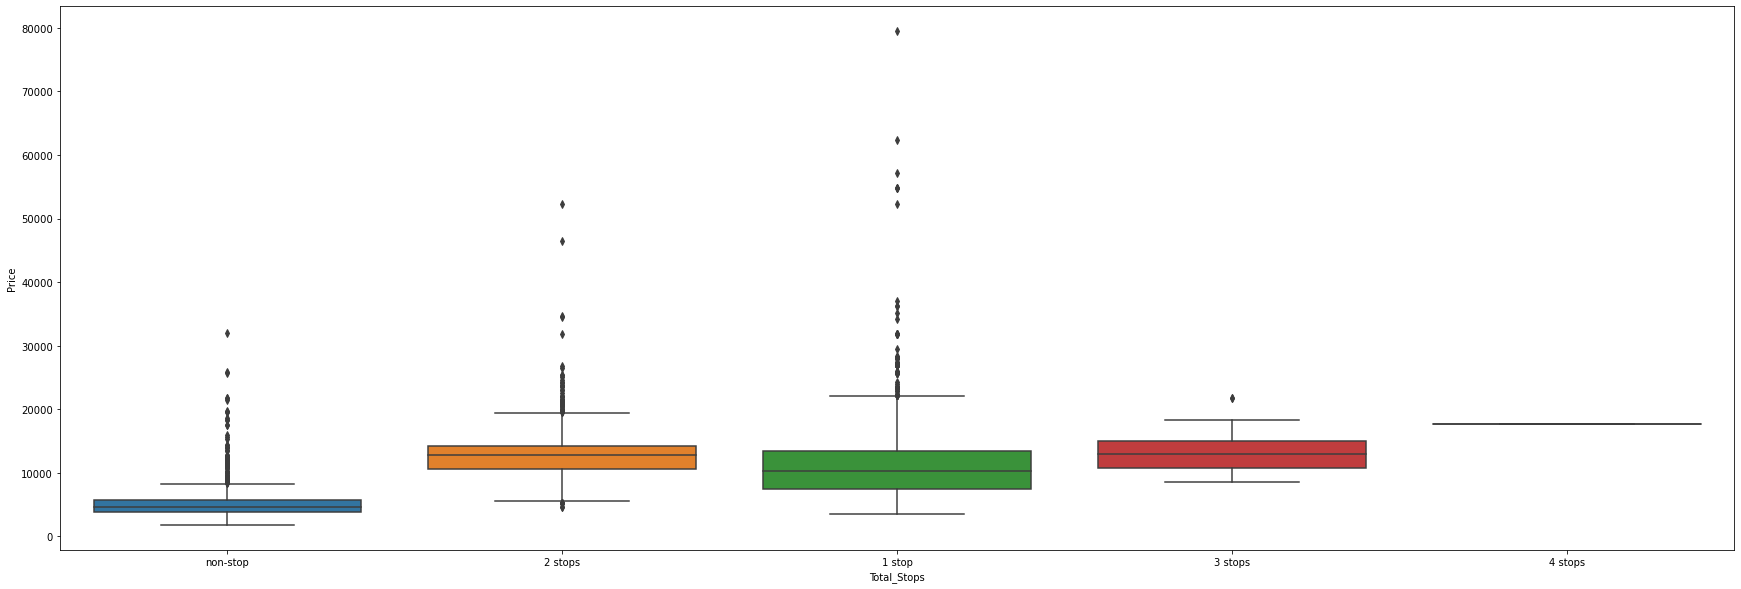

In [34]:
anaylsis('Total_Stops')

In [35]:
def dummies(col):
    return pd.get_dummies(df[col],drop_first=True)

In [36]:
airline = dummies('Airline')
airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [37]:
source =dummies('Source')
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
destination = dummies('Destination')
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
stops = dummies('Total_Stops')
stops.head()

,2 stops,3 stops,4 stops,non-stop
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0


In [40]:
df['Route_1'] =df['Route'].str.split('→').str[0]
df['Route_2'] =df['Route'].str.split('→').str[1]
df['Route_3'] =df['Route'].str.split('→').str[2]
df['Route_4'] =df['Route'].str.split('→').str[3]
df['Route_5'] =df['Route'].str.split('→').str[4]

In [41]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [42]:
df.isnull().sum()

Airline                    0
Source                     0
Destination                0
Route                      0
Total_Stops                0
Additional_Info            0
Price                      0
journey_day                0
journey_month              0
Dep_Time_hour              0
Dep_Time_minute            0
Arrival_Time_hour          0
Arrival_Time_minute        0
Duration_hour              0
Duration_min               0
Route_1                    0
Route_2                    0
Route_3                 3491
Route_4                 9116
Route_5                10636
dtype: int64

In [43]:
for i in ['Route_3','Route_4','Route_5']:
    df[i] = df[i].fillna('None')

In [44]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [45]:
dict = {'non-stop': '0', '2 stops':'2', '1 stop':'1', '3 stops':'3', '4 stops':'4'}
df['Total_Stops'] = df['Total_Stops'].map(dict)

In [46]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45,BLR,NAG,DEL,None,None


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i] = le.fit_transform(df[i])


In [50]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


In [51]:
drop_cols('Route')
drop_cols('Additional_Info')
drop_cols('Airline')
drop_cols('Source')
drop_cols('Destination')

In [52]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,25,2,25,1,3,5
2,2,13882,6,9,9,25,4,25,19,0,3,32,4,5,5
3,1,6218,5,12,18,5,23,30,5,25,2,34,3,13,5
4,1,13302,3,1,16,50,21,35,4,45,0,34,8,13,5


In [53]:
data_ = pd.concat([df,airline,source,destination],axis=1)

In [54]:
data_.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [55]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

G:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


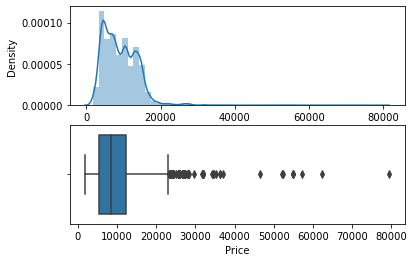

In [56]:
plot(data_,'Price')

In [57]:
data_['Price'] = np.where(data_['Price']>=40000,data_['Price'].median(),data_['Price'])

G:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


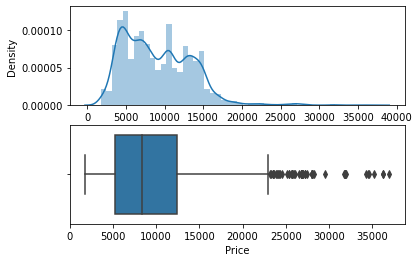

In [58]:
plot(data_,'Price')

In [59]:
X = data_.drop(['Price'],axis=1)
X.head()

,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,Route_1,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,2,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,3,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,2,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
Y = data_['Price']
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [61]:
from sklearn.feature_selection import mutual_info_classif

In [62]:
mutual_info_classif(X,Y)

array([2.16009232e+00, 1.08892563e+00, 8.54652578e-01, 1.45713919e+00,
       1.18748499e+00, 1.83126580e+00, 1.52193285e+00, 1.77371029e+00,
       1.06223466e+00, 2.02761873e+00, 2.80336605e+00, 2.31190153e+00,
       1.47225345e+00, 6.64040289e-01, 7.44098141e-01, 1.02001399e-01,
       6.80021670e-01, 9.26158575e-01, 0.00000000e+00, 5.62355030e-01,
       1.85942614e-02, 3.25765966e-01, 0.00000000e+00, 2.35166709e-01,
       2.56749217e-03, 1.68896129e-01, 1.55353948e+00, 8.97260413e-01,
       2.81576939e-01, 1.54619993e+00, 4.11670521e-01, 3.12259575e-01,
       1.73526436e-01, 3.70359878e-01])

In [63]:
imp = pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Total_Stops,2.115241
journey_day,1.076324
journey_month,0.849257
Dep_Time_hour,1.447592
Dep_Time_minute,1.211113
Arrival_Time_hour,1.842072
Arrival_Time_minute,1.523601
Duration_hour,1.779198
Duration_min,1.077184
Route_1,2.010035


In [64]:
imp.columns = ['importance']

In [65]:
imp.sort_values(by='importance',ascending = False)

,importance
Route_2,2.785009
Route_3,2.306206
Total_Stops,2.115241
Route_1,2.010035
Arrival_Time_hour,1.842072
Duration_hour,1.779198
Delhi,1.532726
Cochin,1.531259
Route_4,1.524321
Arrival_Time_minute,1.523601


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [68]:
from sklearn import metrics
import pickle

In [69]:
def predict(ml_model,dump):
    model =ml_model.fit(X_train,Y_train)
    print('training score:{}'.format(model.score(X_train,Y_train)))
    y_predict = model.predict(X_test)
    print('predictions:\n {}'.format(y_predict))
    print('\n')
    r2_score = metrics.r2_score(Y_test,y_predict)
    print('r2_score is :{}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(Y_test,y_predict))
    print('MSE:',metrics.mean_squared_error(Y_test,y_predict))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,y_predict)))
    
    sns.distplot(Y_test-y_predict)
    
    if dump==1:
        with open('project_model','wb') as f:
            pickle.dump(model,f)

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

training score:0.9526702149766866
predictions:
 [13397.99       13171.623       8775.56       ...  6574.38
  4255.18333333  5918.23      ]


r2_score is :0.8150403988674394
MAE: 1179.4018944615414
MSE: 4009152.900848671
RMSE: 2002.28691771401


G:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


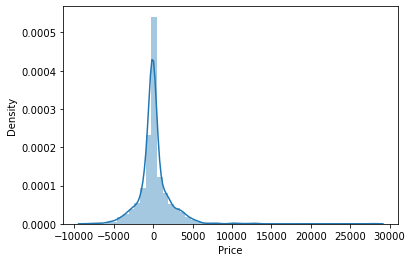

In [72]:
predict(RandomForestRegressor(),1)

training score:0.6245987526030596
predictions:
 [ 9261.76448811 10467.50129471 10701.72591762 ...  8326.28997629
  8358.37470675  6177.81851462]


r2_score is :0.5830057160479182
MAE: 2024.6633183897259
MSE: 9038697.277172584
RMSE: 3006.4426282855597


G:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


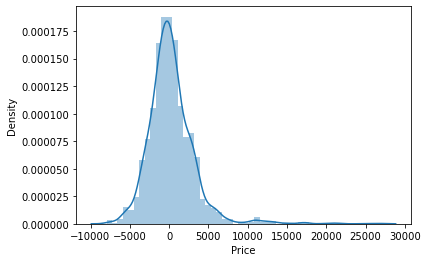

In [73]:
predict(LinearRegression(),0)

training score:0.8795787009947338
predictions:
 [14871. 18371.  8476. ...  6171.  3398.  6094.]


r2_score is :0.6344348779538552
MAE: 1496.0636406176884
MSE: 7923927.49836219
RMSE: 2814.9471572948205


G:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


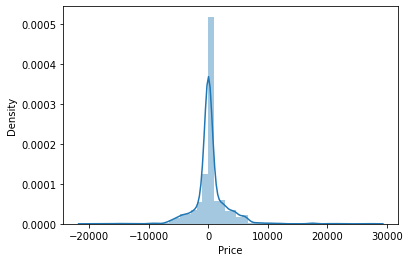

In [74]:
predict(DecisionTreeClassifier(),0)

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
reg_rf=RandomForestRegressor()

In [77]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [78]:
random_grid ={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,18,100,16]  
}

In [79]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 18, 100, 16]}

In [80]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions = random_grid,cv=3,verbose=2,n_jobs=-1)

In [81]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 18, 100,
                                                              16],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [83]:
prediction=rf_random.predict(X_test)

G:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

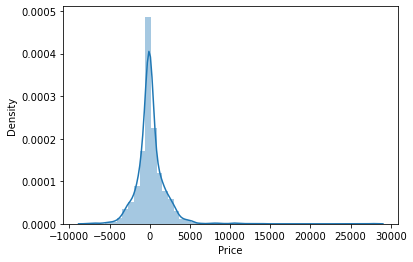

In [84]:
sns.distplot(Y_test-prediction)

In [85]:
metrics.r2_score(Y_test,prediction)

0.8395161590634117